# Theory training

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

Matplotlib is building the font cache; this may take a moment.


In [2]:
path=r'/Users/sofiakazeko/Jupiter/Dec-2024 Instacart Basket Analysis'

In [3]:
#3 import the df_ords_prods_merge
ords_prods_merge= pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_ords_prods_merge_4.8.pkl'))

<Axes: xlabel='orders_day_of_week'>

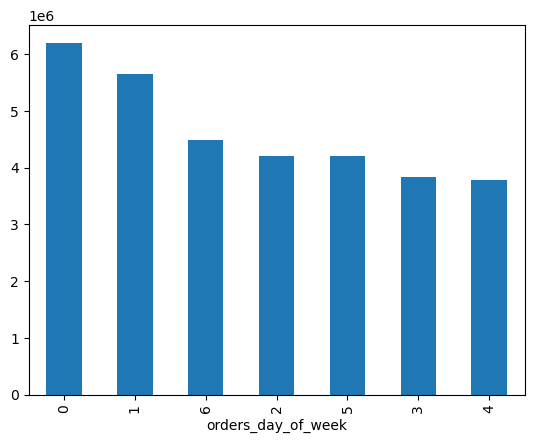

In [4]:
ords_prods_merge['orders_day_of_week'].value_counts().plot.bar()

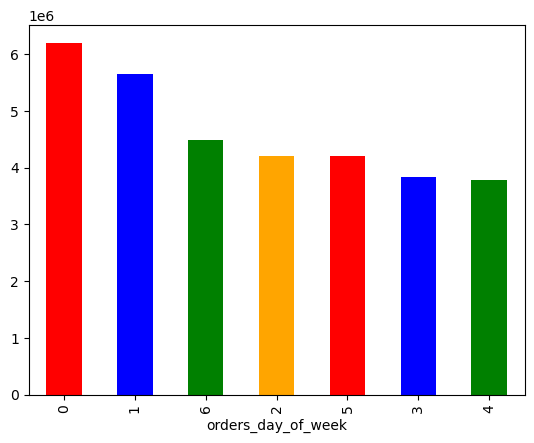

In [5]:
bar=ords_prods_merge['orders_day_of_week'].value_counts().plot.bar(color=['red', 'blue', 'green', 'orange'])

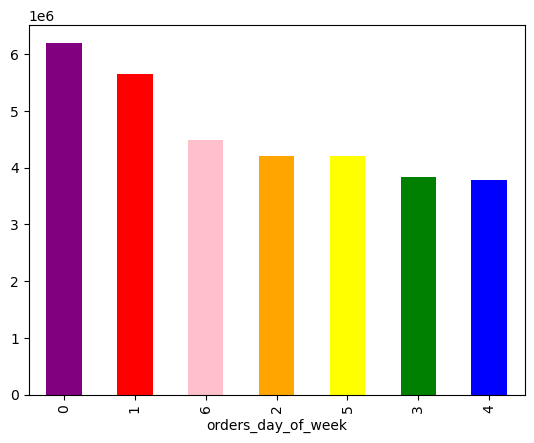

In [6]:
bar = ords_prods_merge['orders_day_of_week'].value_counts().plot.bar(color =['purpble', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

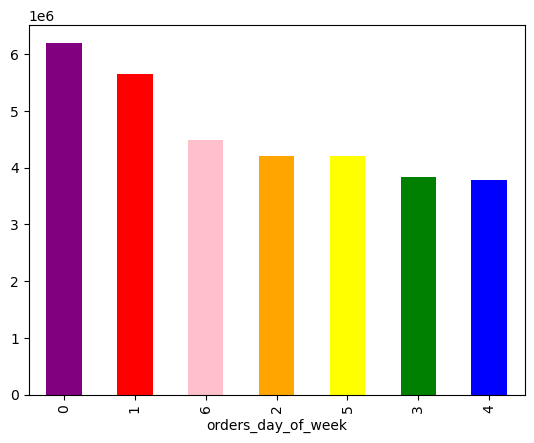

In [7]:
bar.figure

In [9]:
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

# Histogram 

<Axes: ylabel='Frequency'>

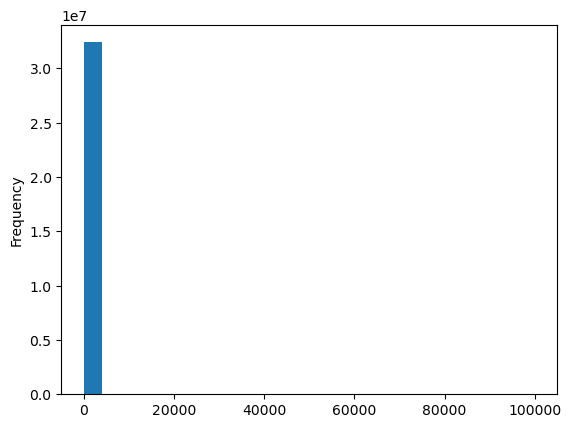

In [10]:
ords_prods_merge['prices'].plot.hist(bins = 25)

# Scatterplot

<Axes: xlabel='prices', ylabel='prices'>

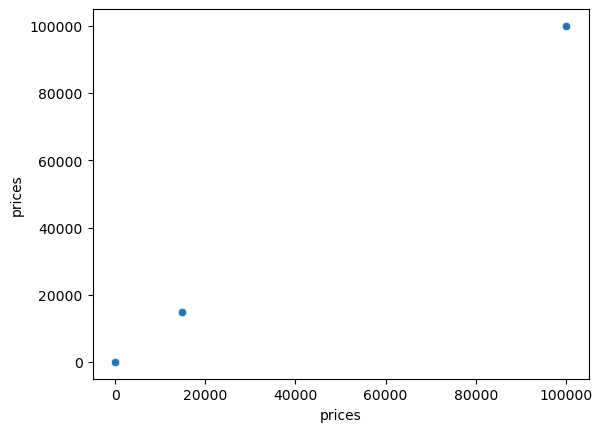

In [11]:
sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge)

In [12]:
ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

,order_id,user_id,order_number,orders_day_of_week,order_time,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,...,prices,price_range_loc,busiest_day,busiest_period_of_day,max_order,loyalty_flag,mean_prices,spending_flag,median_days,frequency_flag
1576,912404,17,12,2,14,5.0,False,21553,5,0,...,14900.0,High-range product,Regularly busy,Most orders,40,Regular customer,108.648300,High spender,5.0,Frequent customer
1638,603376,17,22,6,16,4.0,False,21553,3,1,...,14900.0,High-range product,Regularly busy,Most orders,40,Regular customer,108.648300,High spender,5.0,Frequent customer
16522,3264360,135,2,2,21,13.0,False,21553,6,0,...,14900.0,High-range product,Regularly busy,Average orders,4,New customer,1154.792236,High spender,12.0,Regular customer
16528,892534,135,3,0,8,12.0,False,21553,3,1,...,14900.0,High-range product,Busiest day,Average orders,4,New customer,1154.792236,High spender,12.0,Regular customer
53672,229704,342,8,1,19,30.0,False,21553,9,0,...,14900.0,High-range product,Busiest day,Average orders,16,Regular customer,114.426620,High spender,23.0,Non-frequent customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32320511,3172853,205650,18,1,9,7.0,False,21553,17,1,...,14900.0,High-range product,Busiest day,Most orders,25,Regular customer,351.141632,High spender,6.0,Frequent customer
32347717,2504315,205818,3,5,15,3.0,False,21553,13,0,...,14900.0,High-range product,Regularly busy,Most orders,25,Regular customer,170.073776,High spender,13.0,Regular customer
32347727,1108388,205818,5,4,5,1.0,False,21553,5,1,...,14900.0,High-range product,Least busy,Fewest orders,25,Regular customer,170.073776,High spender,13.0,Regular customer
32380527,1916142,206049,1,2,17,NaN,True,21553,2,0,...,14900.0,High-range product,Regularly busy,Most orders,5,New customer,938.031250,High spender,7.0,Frequent customer


In [15]:
# make the outliners as missing values
ords_prods_merge.loc[ords_prods_merge['prices'] >100, 'prices'] = np.nan

In [16]:
ords_prods_merge['prices'].max()

25.0

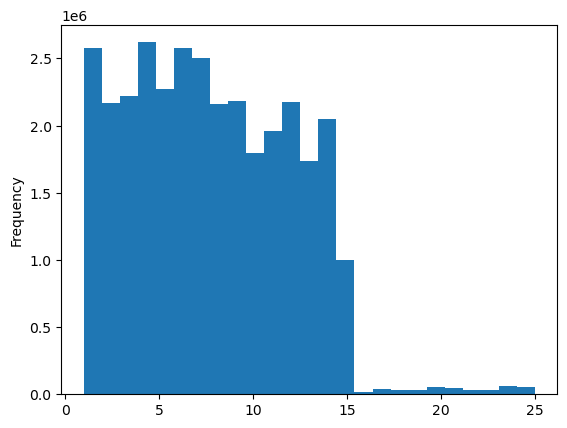

In [17]:
hist=ords_prods_merge['prices'].plot.hist(bins = 25)

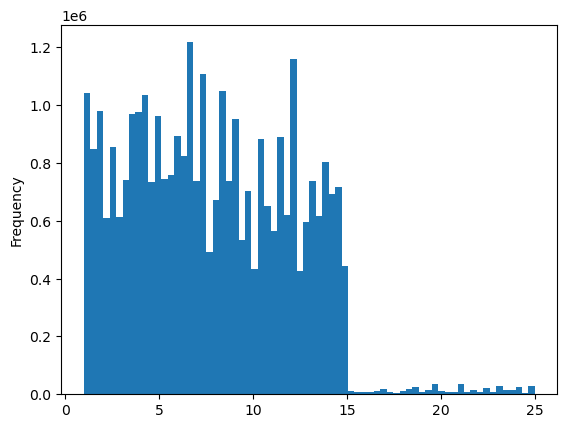

In [18]:
hist=ords_prods_merge['prices'].plot.hist(bins = 70)

In [19]:
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices.png'))

In [22]:
# Sampling Data 
np.random.seed(4)

In [21]:
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [23]:
big = ords_prods_merge[dev]

In [24]:
small = ords_prods_merge[~dev]

In [25]:
len (ords_prods_merge)

32404859

In [26]:
len(big)+len(small)

32404859

# new dataframe, df_2, that contains only the “prices” and “orders_day_of_week” columns from your small subset.

In [27]:
df_2 = small[['orders_day_of_week','prices']]

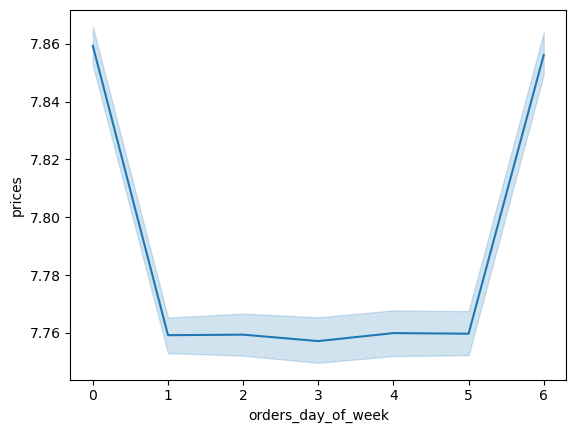

In [28]:
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

# Exercise 4.9 part 2

In [29]:
# import the df_cust_merge 
df_cust_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_cust_merge.pkl'))

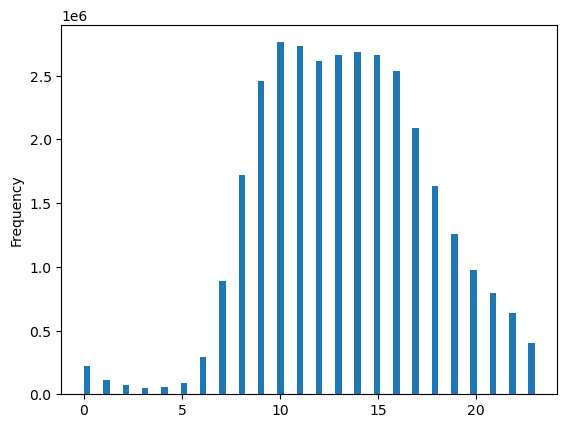

In [36]:
# Create a histogram of the “order_hour_of_day” column
hist=df_cust_merge['order_time'].plot.hist(bins = 70)

as per histogram most of the orders are done between 8-18 o'clock

In [37]:
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_order_time.png'))

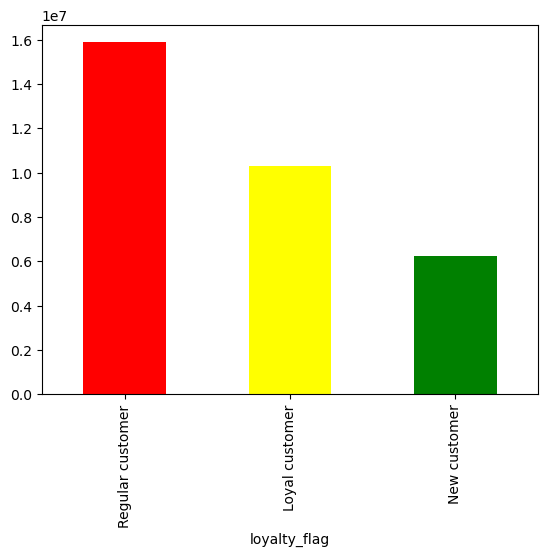

In [40]:
#Create a bar chart from the “loyalty_flag” column.
bar = df_cust_merge['loyalty_flag'].value_counts().plot.bar(color =[ 'red',  'yellow', 'green', ])

In [41]:
df_cust_merge.groupby(['loyalty_flag']).user_id.nunique()

loyalty_flag
Loyal customer       17017
New customer        112328
Regular customer     76864
Name: user_id, dtype: int64

In [43]:
# Group by 'loyalty_flag' and count unique 'user_id's
loyalty_counts = df_cust_merge.groupby('loyalty_flag')['user_id'].nunique()

<Axes: xlabel='loyalty_flag'>

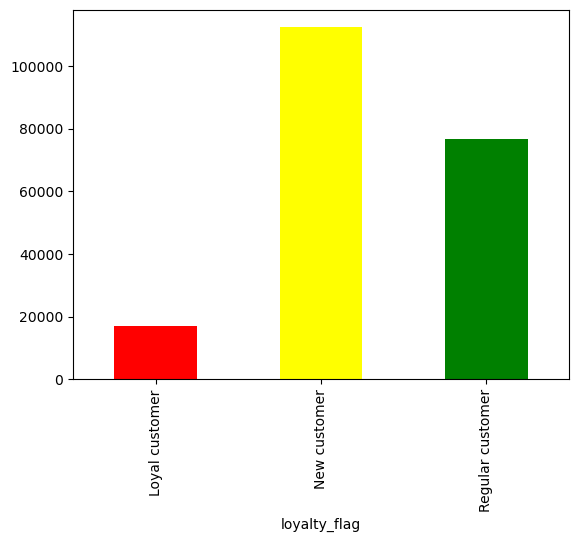

In [44]:
loyalty_counts.plot.bar(color=['red', 'yellow', 'green'])

In [60]:
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_flag.png'))

# 5.Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day

In [45]:
# sample was already created earlier using it to make a line chart
df_3 = small[['order_time','prices']]

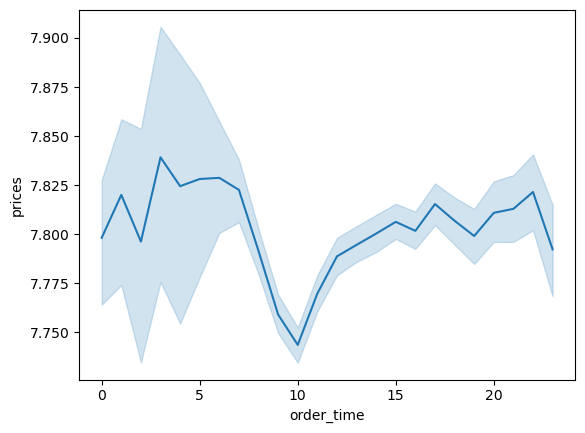

In [83]:
line_1 = sns.lineplot(data = df_3, x = 'order_time',y = 'prices')

In [84]:
line_1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_1_prices_hour.png'))

# 6.exploring the connections between age and number of dependents

In [47]:
# Sampling latest df
np.random.seed(4)

In [48]:
dev_1 = np.random.rand(len(ords_prods_merge)) <= 0.7

In [50]:
big_1 = df_cust_merge[dev_1]

In [51]:
small_1 = df_cust_merge[~dev_1]

In [52]:
len (df_cust_merge)

32404859

len (big_1)+len(small_1)

In [58]:
#creating df only with 2 necessary columns
df_4 = small_1[['Age','number_of_dependants']]

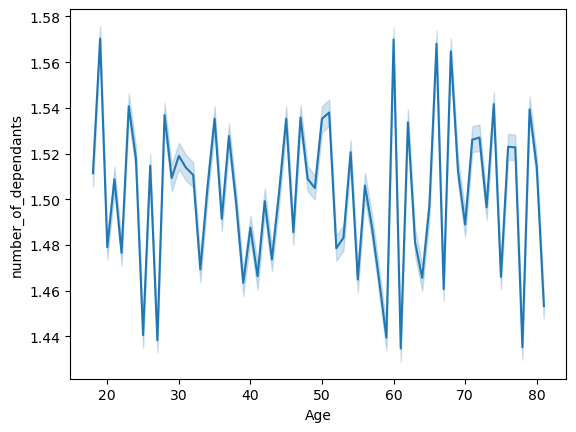

In [68]:
line_2 = sns.lineplot(data = df_4, x = 'Age',y = 'number_of_dependants')

it looks like most of the clients have 1 or 2 kids and the trend is the same for all age groups.

In [80]:
line_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_2_age_dependants.png'))

# 7.connection between age and spending power (income).

<Axes: xlabel='Age', ylabel='income'>

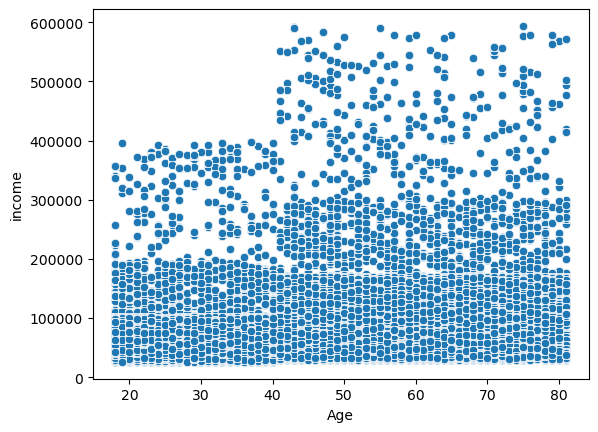

In [78]:
sns.scatterplot(x = 'Age', y = 'income',data = df_cust_merge)

From the scatterplot above, we can observe that after the age of 40, the percentage of people with higher incomes increases significantly, with a larger proportion of individuals earning between 200,000 and 300,000. Meanwhile, for income ranges between 0-200,000 and 300,000-400,000, the distribution appears consistent across all age groups. Additionally, the income bracket above 400,000 is only represented by clients over the age of 40.
